# Text-to-Speech Synthesis

## 0. Reference

[一文了解语音合成技术（TTS）](https://zhuanlan.zhihu.com/p/656923300)  </br>
[语音识别系列之决策树](https://zhuanlan.zhihu.com/p/107481181)  </br>
[新手语音入门（四）： 传统语音识别技术简介 | 隐马尔可夫链 | 声学/语言模型 | WFST解码](https://bbs.huaweicloud.com/blogs/320751)


## 1. Introduction to Three Pipelines

### 1.1 The three-stage pipeline
- 三阶段语音合成流水线包含 文本前端（Text Frontend） 、声学模型（Acoustic Model） 和 声码器（Vocoder）/ Waveform generator 三个主要模块: 通过文本前端模块将原始文本转换为字符/音素 (`linguistic specification`)；通过声学模型将字符/音素转换为声学特征，如线性频谱图、mel 频谱图、LPC 特征等；通过声码器将声学特征转换为波形。

<figure>
<img src= "https://pica.zhimg.com/v2-1722b6a0e40d47fb9be7470df83104fe_1440w.jpg" width=600/>
</figure>


### 1.2 The two-stage pipeline
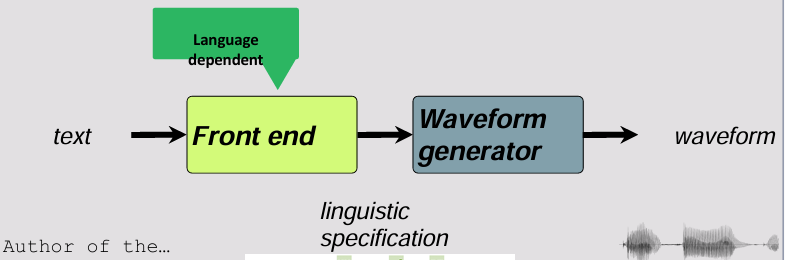

### 1.3 The End-to-End Pipeline 

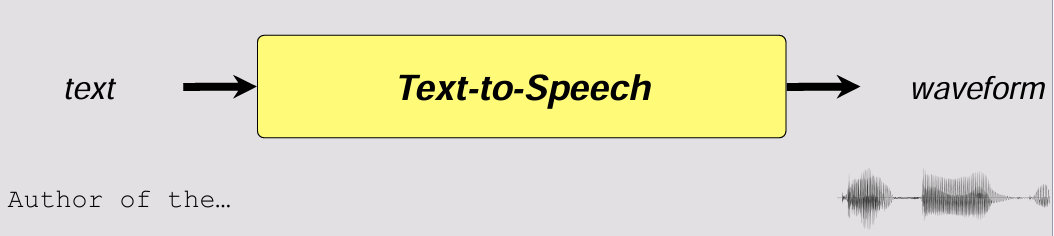


## 2. Front End

### 2. 1 Classic front end
- A chain of processes. Each process is performed by a **model**. These models are independently trained in a supervised fashion on annotated data.

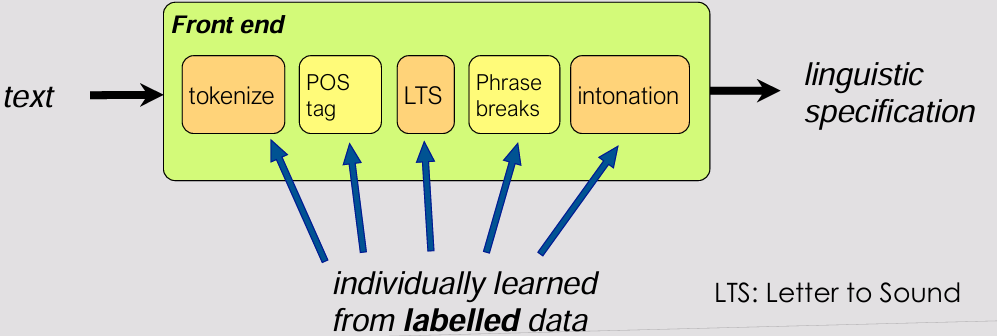

### 2.2 Neural front end 
- Learn by a neural network

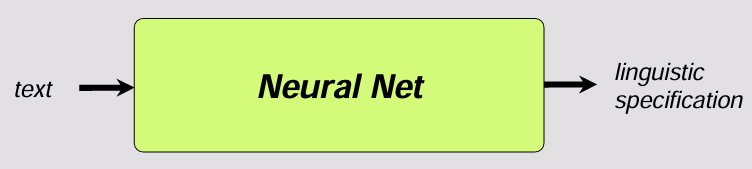


## 3. Acoustic model


- **Acoustic model**: For acoustic model, we have HMM-GMM-DecisionTree, DNN_based, RNN_based, and Transformer_based. The following is the figure of DNN_based AM. 


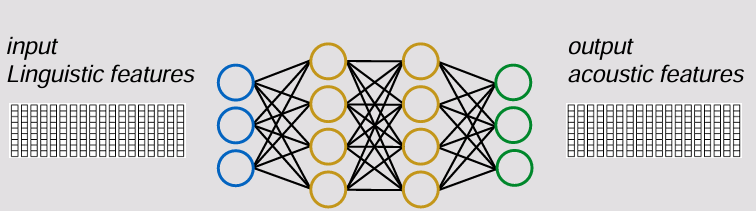







### 3.1 HMM-GMM-DecisionTree AM

- **隐马尔科夫模型(HHM)** 是结构最简单的动态贝叶斯网（dynamic Bayesian network，也被称作有向图模型），HMM是可以用于标注问题的统计数学模型，描述由隐藏的马尔科夫链随机生成观测序列的过程，属于 **生成模型** 。HMM模型在语音识别、自然语言处理、生物信息、模式识别等领域有广泛的应用.

##### 3.1.1 HMM模型的定义
- 隐藏的马尔科夫链随机生成的状态的序列，称为`状态序列（state sequence）`，记作$\boldsymbol{y}$；每个状态生成一个观测，而由此产生的观测的随机序列，称为`观测序列（observation sequence）`，记作$\boldsymbol{x}$。序列的每一个位置又可以看作一个时刻。<p>
- 使用HMM模型来解决的问题一般有两个特征：
    - 1. 问题是基于序列的，比如时间序列、状态序列。
    - 2. 问题中有两类数据，一类序列数据是可以观测到的，即观测序列；而另一类数据是不能观察到的，即隐藏状态序列，简称状态序列。


- **HMM 模型及其假设** ： 
    - HMM 的第一个假设： 将马尔科夫假设作用于状态序列，假设当前状态$y_{t}$仅仅依赖于前一个状态$y_{t-1}$，连续多个状态构成隐马尔科夫链$ \boldsymbol{y}$。数学表达式为：$$p(y_t | y_{t-1:1}, x_{t-1:1}) = p(y_t | y_{t-1}) \quad \text{对于 } t = 1, 2, 3, \ldots, T$$

    
    - HMM 的第二个假设:任意时刻的观测$x_{t}$ 只依赖于该时刻的状态$y_{t}$，与其他时刻的状态或观测独立无关。数学表达式为：$$p(x_t | y_{t-1:1}, x_{t-1:1}) = p(x_t | y_t) \quad \text{对于 } t = 1, 2, 3, \ldots, T$$

    - HMM 模型如下图所示

    <figure>
    <img src= "https://i-blog.csdnimg.cn/blog_migrate/3786403b12956f7895a32daed017cc57.png" width=600/>
    </figure>

    - 设  $ Q = (q_1, q_2, \ldots, q_N) $  是所有可能的状态($y$)的集合，$ V = (v_1, v_2, \ldots, v_M) $是所有可能的观测($x$)的集合。其中，N 是可能的状态数，M是可能的观测数。那么 HMM 模型可以用三元组$ (A, B, \pi) $ 来表示，其中：$ A $ 是状态转移概率矩阵；$ B $ 是发射概率矩阵；$ \pi $ 是初始状态分布。

$$
A = [a_{ij}]_{N \times N} = [p(y_{t+1} = v_j | y_t = v_i)]_{N \times N}
$$

$$
B = [b_{ij}]_{N \times M} = [p(x_t = v_j | y_t = q_i)]_{N \times M}
$$

##### 3.1.2 HMM in TTS (HMM-GMM)

- `Acoustic model` 可以用概率模型来描述：$P(X∣W)$， 其中$ X=[x_{1},x_{2},x_{3},…] $, $x_{i}$ ​表示每一帧的声学特征向量（比如MFCC）， 而$W=[w_{1},w_{2},w_{3},…]$， $w_{i}$​表示 word/token。进一步，在 HMM 中会将目标 token 序列转为 States 序列，用$ S $来表示。State 是什么？它是由人定义的，是比音素 Phoneme 还要小的单位。<p>
- 我们使用` what do you think `句子来举例，使用` phoneme` 作为 `token `单位的话，分解结果如下。不过，由于每个因素都会受到前后因素的影响，所以相同的因素 uw 说不定实际上发音会不同。所以我们会更加细分，采用 Tri-phone 来作为 token 单位，即当前音素加上前面的和后面的音素。<p>
- 而 State 就是比 Tri-phone 更小的单位，我们可以规定每个 Tri-phone 由 3 或者 5 个 state 构成。多少就取决于你所拥有的计算资源。而拆解出来的 State 也保留了发音顺序信息。<p>


<figure>
<img src= "https://i-blog.csdnimg.cn/blog_migrate/02ba92fccdceb5fd48a46069565307a3.png" width=700/>
</figure>

- 既然我们需要计算给定 States 时，声学特征序列$ X $的几率，那我们就需要弄清楚 State 是怎么产生出声学特征的。其实很简单，假设我们一共有3个 State，而 X 有 6 个 Vector，那么我们首先进入第一个 State，产生一些向量，足够了以后进入下一个 State，以此类推，依次走完就结束了。

<figure>
<img src= "https://i-blog.csdnimg.cn/blog_migrate/1ac498b1ee99d65961ebe9d7d05ae5f9.png" width=700/>
</figure>

- 为了完成刚刚的过程，我们需要计算两个几率，一个是当前状态结束跳到下一个状态的几率，另一个就是当前状态生成对应声学特征的几率。二者我们分别称为 Transition Probability（转移概率） 和 Emission Probility（发射概率）。

    - Transition Probability：本次的 vector 是由状态 a 产生的，下一个 vector 是由状态 b 产生的概率。
    - Emission Probability：给定一个 State，产生某种 acoustic feature 的概率。我们认为，每一个状态所能发射的声学特征都有固定的概率分布，我们会用 GMM（Gaussian Mixture Model，高斯混合模型）来表示这个概率。

    <figure>
    <img src= "https://i-blog.csdnimg.cn/blog_migrate/21898f221ede3c2f1eb5a5683db4783f.png" width=700/>
    </figure>

- 而发射概率的计算也间接说明了我们为什么需要如此小的单位 State 作为建模单位。因为我们要假设每个状态发射出来的分布稳定。如果单位太大，很有可能其发射的声学特征分布就会变来变去。比如如果使用字符来作为单位，那就会出现这种情况：c 这个字母它的发音不是固定的。它在很多时候是发"ke"，但它在h后面就发音"ch"。这样就不适合拿来当作HMM的状态。
- **Alignment** : 假设我们已经知道了 Transition Probability 和 Emission Probability，然而我们还是计算不出来我们的目标概率 P(X|S)，因为我们还缺少 Alignment。这是什么意思？就是我们还是不知道这些 vector 是对应到哪一个状态的。也就是说我们需要知道哪一个声学特征，是由哪一个状态产生的，才有办法用发射概率和转移概率去计算 P(X|S)。 解决方法这里不进行赘述，请参考[对齐方式详解](https://blog.csdn.net/m0_56942491/article/details/134692567)


<figure>
<img src= "https://i-blog.csdnimg.cn/blog_migrate/3f6cfeb264b0f4a294f13723409d5969.png" width=700/>
</figure>


- 假设音素集有N个音素，则共有N的三次方个三音素， 有如下问题：1. 建模单元数又太多了。100个音素的话，则会有100万个三音素，加上每个音素的HMM三状态和状态所对应的GMM参数，参数量太大了。2. 数据稀疏问题。有的三音素在训练语料中出现次数很少，则对应的训练数据就很少。决策树的引入正是为了解决如上问题。下面直接给出决策树的结构（如下图所示），然后回过头看决策树是否解决了我们上述的几个问题，再讨论如何构建一个决策树。

<figure>
<img src= "https://pica.zhimg.com/v2-7fe12c941210631a31b8acd02fe6eb48_1440w.jpg" width=700/>
</figure>

从图中，我们可以看到，决策树有如下几个要点：

- **决策树是一棵二叉树**（图中无论是椭圆形、菱形都可以当作二叉树的一个节点）。
- **每个非叶子节点上都有一个问题**（菱形所示，Left UVowel是问你当前三音素的左边的音素是不是一个UVowel，Right Vowel是问你当前三音素的右边的音素是不是一个元音音素），每个三音素对于该问题都会有一个Yes或No的的答案，那么对所有的三音素来讲，该问题会把所有三音素分成Yes集合和No集合。
- **决策树的叶子节点是相近（绑定）三音素的集合**（从根节点经过一些列的问题，他们最终被分到了同一个节点）。
- **决策树建立的基本单元是状态**（图中，根节点是说这是以zh为中心音素的三音素的第三个状态的决策树，第一个状态和第二个状态也都有各自独立的决策树，举例来说，比如a-zh+c, o-zh+c假设它们的第一个状态可能绑定在一起，但并不代表说它们的第二个、第三个状态也绑定在一起，因为2/3状态有各自独立的决策树），这一点其实和解决上述三个问题关系不大，但这么做也是为了更精细化的建模。

此时：
- 建模单元数过多的问题，可以通过控制决策树的叶子节点数量解决。
- 数据稀疏问题通过相近三音素的绑定在一个叶子节点上解决，一个叶子节点对应一个GMM，相比之前单个三音素的状态各自对应一个GMM，训练数据增加。